In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [33]:
gentoo = pd.read_csv('data/gentoo.csv')

In [34]:
gentoo=gentoo.rename(columns={'Culmen Length (mm)':'Bill length', 'Culmen Depth (mm)':'Bill depth'})
gentoo

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Bill length,Bill depth,Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN
1,PAL0708,2,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN
2,PAL0708,3,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN
3,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
4,PAL0708,5,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...
120,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
121,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
122,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [35]:
gentoo = gentoo.loc[:,['Bill length','Bill depth','Flipper Length (mm)','Body Mass (g)']]

In [36]:
gentoo

,Bill length,Bill depth,Flipper Length (mm),Body Mass (g)
0,46.1,13.2,211.0,4500.0
1,50.0,16.3,230.0,5700.0
2,48.7,14.1,210.0,4450.0
3,50.0,15.2,218.0,5700.0
4,47.6,14.5,215.0,5400.0
...,...,...,...,...
119,NaN,NaN,NaN,NaN
120,46.8,14.3,215.0,4850.0
121,50.4,15.7,222.0,5750.0
122,45.2,14.8,212.0,5200.0


### <center> Covariance Matrix
|                             Variance                              |  Covariance                      |
|:-----------------------------------------------------------------:|:--------------------------------:|
|                 ![](images/covariance1.png#left)                  | ![](images/covariance2.png#right)|
|                 ![](images/covariance.png)                                                           |


In [37]:
# compute a covariance matrix
gentoo.cov()

,Bill length,Bill depth,Flipper Length (mm),Body Mass (g)
Bill length,9.497845,1.945580,13.213834,1039.626150
Bill depth,1.945580,0.962792,4.495995,355.694556
Flipper Length (mm),13.213834,4.495995,42.054911,2297.144476
Body Mass (g),1039.626150,355.694556,2297.144476,254133.180061


In [38]:
# compute a correlation matrix
gentoo.corr()

,Bill length,Bill depth,Flipper Length (mm),Body Mass (g)
Bill length,1.000000,0.643384,0.661162,0.669166
Bill depth,0.643384,1.000000,0.706563,0.719085
Flipper Length (mm),0.661162,0.706563,1.000000,0.702667
Body Mass (g),0.669166,0.719085,0.702667,1.000000


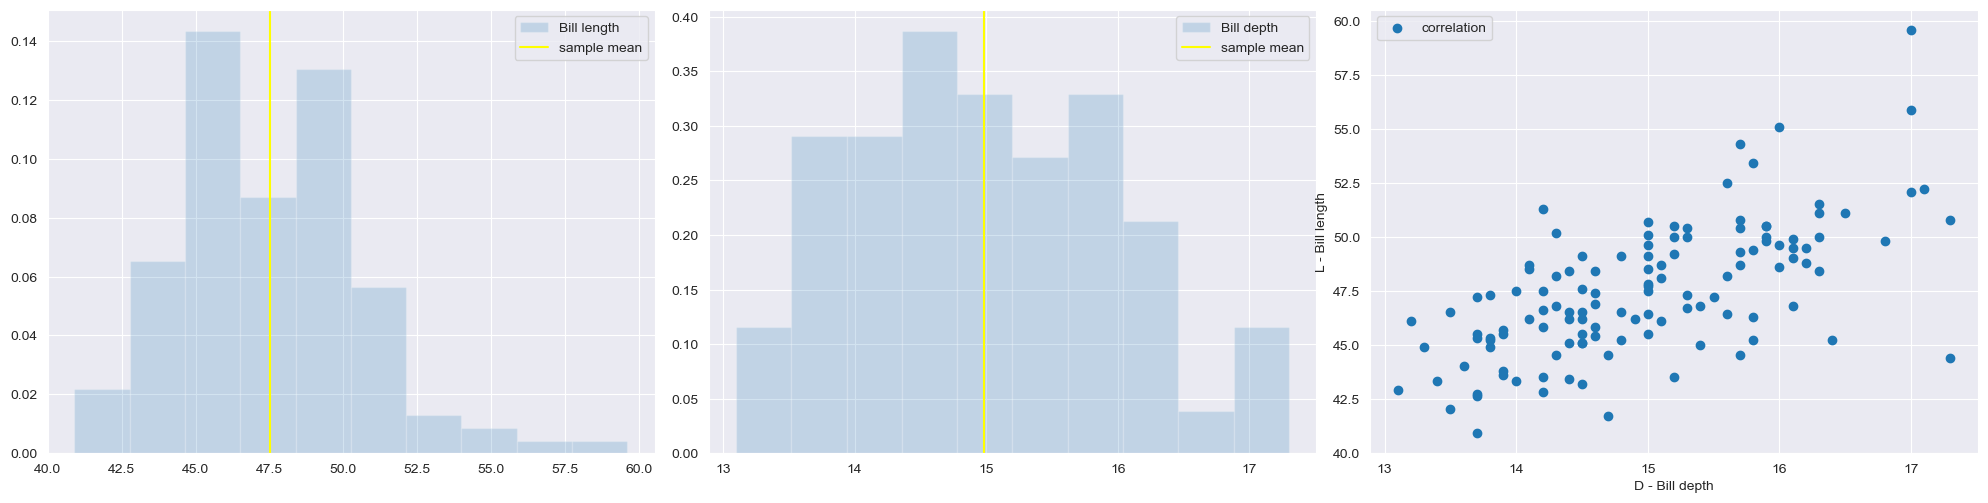

In [39]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
fig.tight_layout()

ax[0].hist(gentoo['Bill length'], label='Bill length',density=True, alpha = 0.2)
ax[0].axvline(gentoo['Bill length'].mean(), label = 'sample mean', color = 'yellow')
ax[1].hist(gentoo['Bill depth'], label='Bill depth',density=True, alpha = 0.2)
ax[1].axvline(gentoo['Bill depth'].mean(), label = 'sample mean', color = 'yellow')
ax[2].scatter(gentoo['Bill depth'],gentoo['Bill length'], label='correlation',)
ax[2].set_xlabel('D - Bill depth')
ax[2].set_ylabel('L - Bill length')
ax[0].legend()
ax[1].legend()
ax[2].legend()

### Multivariate Distribution
![](images/maltivariate_distribution.png)

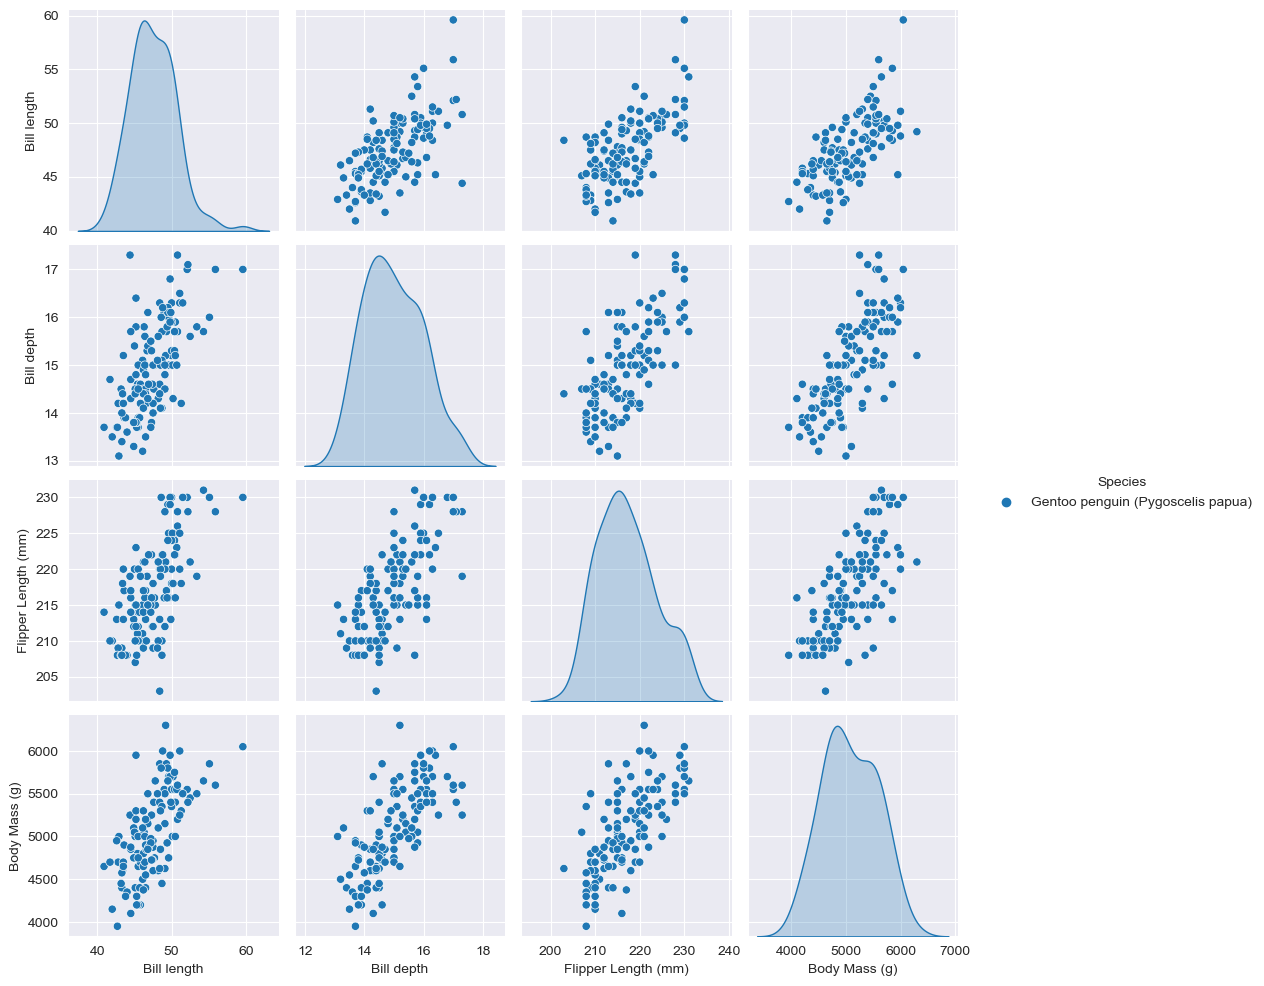

In [41]:
gentoo = pd.read_csv('data/gentoo.csv')
gentoo=gentoo.rename(columns={'Culmen Length (mm)':'Bill length', 'Culmen Depth (mm)':'Bill depth'})
gentoo = gentoo.loc[:,['Species','Bill length','Bill depth','Flipper Length (mm)','Body Mass (g)']]
sns.pairplot(gentoo, hue = "Species")


In [ ]:
gentoo = pd.read_csv('data/gentoo.csv')
gentoo=gentoo.rename(columns={'Culmen Length (mm)':'Bill length', 'Culmen Depth (mm)':'Bill depth'})
sns.histplot(data=gentoo, x='Bill length', hue='Sex')